# ZJU Dataset

In [60]:
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint

In [44]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

In [8]:
for subj in Path('./zju-gaitacc/session_0/').glob('subj_*'):
    for rec in subj.glob('*'):
        print(rec)

zju-gaitacc\session_0\subj_001\rec_1
zju-gaitacc\session_0\subj_001\rec_2
zju-gaitacc\session_0\subj_001\rec_3
zju-gaitacc\session_0\subj_001\rec_4
zju-gaitacc\session_0\subj_001\rec_5
zju-gaitacc\session_0\subj_001\rec_6
zju-gaitacc\session_0\subj_002\rec_1
zju-gaitacc\session_0\subj_002\rec_2
zju-gaitacc\session_0\subj_002\rec_3
zju-gaitacc\session_0\subj_002\rec_4
zju-gaitacc\session_0\subj_002\rec_5
zju-gaitacc\session_0\subj_002\rec_6
zju-gaitacc\session_0\subj_003\rec_1
zju-gaitacc\session_0\subj_003\rec_2
zju-gaitacc\session_0\subj_003\rec_3
zju-gaitacc\session_0\subj_003\rec_4
zju-gaitacc\session_0\subj_003\rec_5
zju-gaitacc\session_0\subj_003\rec_6
zju-gaitacc\session_0\subj_004\rec_1
zju-gaitacc\session_0\subj_004\rec_2
zju-gaitacc\session_0\subj_004\rec_3
zju-gaitacc\session_0\subj_004\rec_4
zju-gaitacc\session_0\subj_004\rec_5
zju-gaitacc\session_0\subj_004\rec_6
zju-gaitacc\session_0\subj_005\rec_1
zju-gaitacc\session_0\subj_005\rec_2
zju-gaitacc\session_0\subj_005\rec_3
z

In [37]:
df = pd.DataFrame({'X': [], 
                   'Y': [],
                   'Z': []})

In [38]:
with open('./zju-gaitacc/session_0/subj_001/rec_1/3.txt') as f:
    lines = list(map(lambda line: [float(x) for x in line.strip().split(',')], f.readlines()))
    df['X'] = lines[0]
    df['Y'] = lines[1]
    df['Z'] = lines[2]

In [39]:
np.transpose(df.values) 

array([[-0.32, -0.32, -0.32, ..., -0.2 , -0.24, -0.28],
       [-0.92, -0.92, -0.92, ..., -0.88, -0.84, -0.76],
       [-0.2 , -0.2 , -0.2 , ..., -0.4 , -0.4 , -0.36]])

In [40]:
df.tail()

,X,Y,Z
1431,-0.40,-0.92,-0.32
1432,-0.24,-0.92,-0.32
1433,-0.20,-0.88,-0.40
1434,-0.24,-0.84,-0.40
1435,-0.28,-0.76,-0.36


In [48]:
df['magn'] = df.apply(lambda row: np.sqrt(np.square(row['X']) + np.square(row['Y']) + np.square(row['Z'])), axis=1)
df.tail()

,X,Y,Z,magn
1431,-0.40,-0.92,-0.32,1.052996
1432,-0.24,-0.92,-0.32,1.003195
1433,-0.20,-0.88,-0.40,0.987117
1434,-0.24,-0.84,-0.40,0.960833
1435,-0.28,-0.76,-0.36,0.886341


In [49]:
with open('./zju-gaitacc/session_0/subj_001/rec_1/cycles.txt') as f:
    line = f.readlines()[0]
    cycles = list(map(lambda x: int(x), line.strip().split(',')))
print(cycles)

[122, 224, 320, 420, 519, 618, 717, 818, 916, 1018, 1117, 1219, 1344]


In [50]:
with open('./zju-gaitacc/session_0/subj_001/rec_1/useful.txt') as f:
    line = f.readlines()[0]
    useful = list(map(lambda x: int(x), line.strip().split(',')))
print(useful)

[108, 1296]


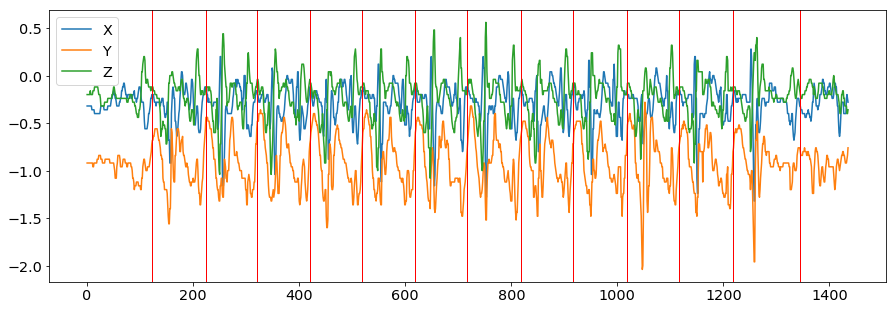

In [51]:
ax = df[['X', 'Y', 'Z']].plot()
for cycle in cycles:
    ax.axvline(x=cycle, linewidth=1, color='r')

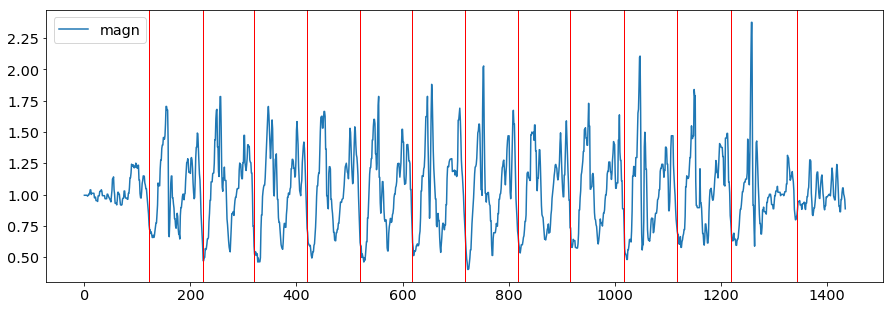

In [52]:
ax = df[['magn']].plot()
for cycle in cycles:
    ax.axvline(x=cycle, linewidth=1, color='r')

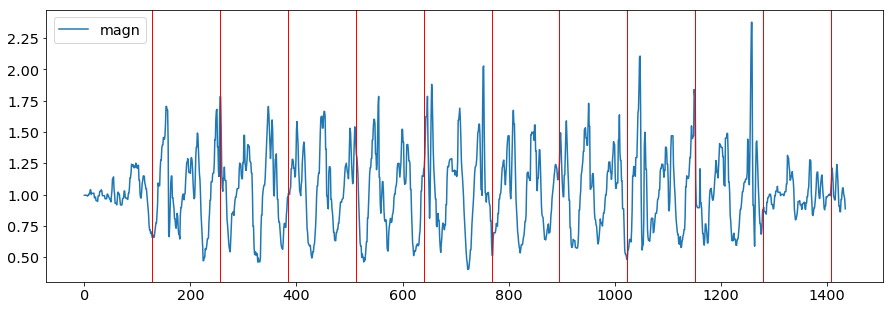

In [57]:
ax = df[['magn']].plot()
for cycle in np.arange(128, 1435, 128):
    ax.axvline(x=cycle, linewidth=1, color='r')

In [62]:
pprint(cycles)
pprint(list(np.arange(128, 1435, 128)))

[122, 224, 320, 420, 519, 618, 717, 818, 916, 1018, 1117, 1219, 1344]
[128, 256, 384, 512, 640, 768, 896, 1024, 1152, 1280, 1408]
